In [68]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D

In [77]:
model = Sequential([
    Input(shape=(32,32,3,)),
    Conv2D(6, (5,5), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(16, (5,5), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(120, (5,5), padding="same", activation="relu"),
    Flatten(),
    Dense(units=84, activation="relu"),
    Dense(units=10, activation="softmax"),
])


In [78]:
model.summary()

Model: "sequential_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7680)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 84)             │       645,204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 697,046 (2.66 MB)

 Trainable params: 697,046 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()

In [74]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [75]:
history = model.fit(x=trainX, y=trainY, batch_size=256, epochs=10, validation_data=(testX, testY))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.2055 - loss: 13.4337 - val_accuracy: 0.4320 - val_loss: 1.5756
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.4780 - loss: 1.4666 - val_accuracy: 0.4949 - val_loss: 1.4113
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5591 - loss: 1.2597 - val_accuracy: 0.5128 - val_loss: 1.3740
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6037 - loss: 1.1346 - val_accuracy: 0.5390 - val_loss: 1.3079
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.6432 - loss: 1.0166 - val_accuracy: 0.5468 - val_loss: 1.3283
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.6797 - loss: 0.9143 - val_accuracy: 0.5500 - val_loss: 1.3575
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.7164 - loss: 0.8157 - val_accuracy: 0.5560 - val_loss: 1.3688
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7475 - loss: 0.7276 - val_acc

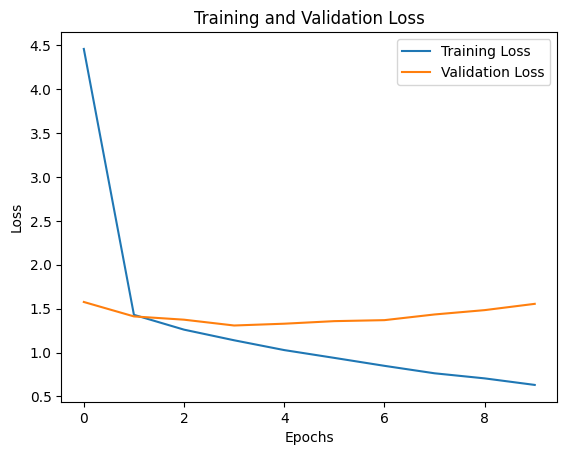

In [76]:
import matplotlib.pyplot as plt

# Access training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss over epochs
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
